# Lab07 - Rozpoznawanie cyfr pisanych ręcznie

In [1]:
from keras.datasets import mnist;
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print( train_images.shape )
print( len(train_labels) )
print( train_labels )
print( train_images[0])


(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   

Liczba  5


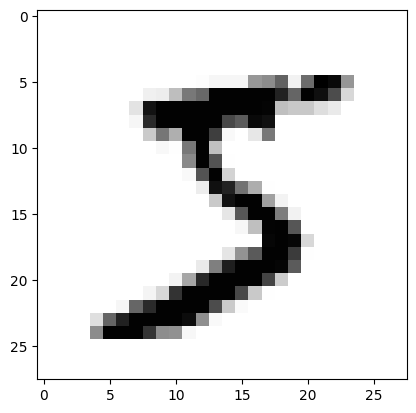

In [3]:
import matplotlib.pyplot as plt
img = train_images[0].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[0])


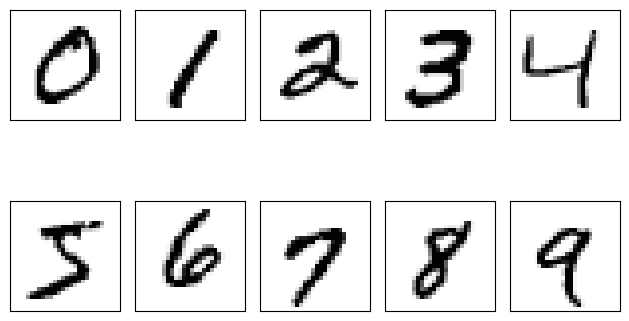

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==i ][0].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


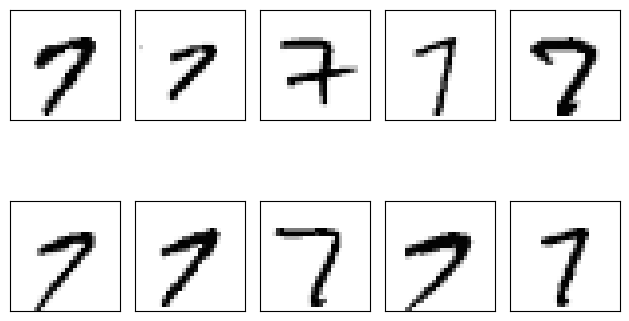

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==7 ][i].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


In [6]:
x_train = train_images.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 256
x_test = test_images.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 256

In [7]:
print( train_images[0])
print( x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print( train_labels[0] )
print( y_train[0] )

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##Tworzenie sieci

In [9]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = network.fit(x_train, y_train, epochs=4, batch_size=10,verbose=1)

Epoch 1/4
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9085 - loss: 0.3088
Epoch 2/4
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9728 - loss: 0.1031
Epoch 3/4
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9812 - loss: 0.0728
Epoch 4/4
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9847 - loss: 0.0604


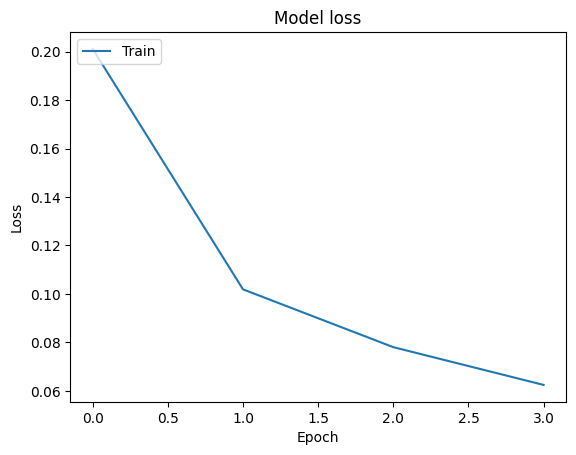

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

y_result_test = network.predict(x_test)

print( np.column_stack( (np.argmax(y_result_test,  axis=1), np.argmax(y_test,  axis=1)) ) )
bledy = 0
for i in range(len(y_test)):
  if np.argmax(y_result_test,  axis=1)[i] != np.argmax(y_test,  axis=1)[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
Liczba bledow ciagu treningowego:  224


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
#y_pred = network.predict(x_train)
# Zaokrąglenie wyników przewidywań
#y_pred_rounded = [np.round(pred) for pred in y_pred]

predict_x = network.predict(x_train)
y_result = np.argmax(predict_x,axis=1)


# Obliczenie metryk
accuracy = accuracy_score(train_labels, y_result)
precision = precision_score(train_labels, y_result, average='weighted')
recall = recall_score(train_labels, y_result, average='weighted')
conf_matrix = confusion_matrix(train_labels, y_result)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Accuracy: 0.9885
Precision: 0.9885825652206314
Recall: 0.9885
Confusion Matrix:
 [[5898    1    1    0    1    2    5    3   10    2]
 [   1 6674    9    1    0    1    4   10   39    3]
 [   7    5 5896    4    4    2    2   18   17    3]
 [   2    4    8 6015    0   32    0   23   32   15]
 [   1    6    1    0 5710    0   16   34    3   71]
 [   4    1    2    7    1 5376    5    7   10    8]
 [   8    2    1    0    1   25 5870    0   11    0]
 [   1    6    9    1    2    0    0 6231    8    7]
 [   5    4    4   11    2   17    4    5 5793    6]
 [  10    2    0    6    5    8    0   54   17 5847]]


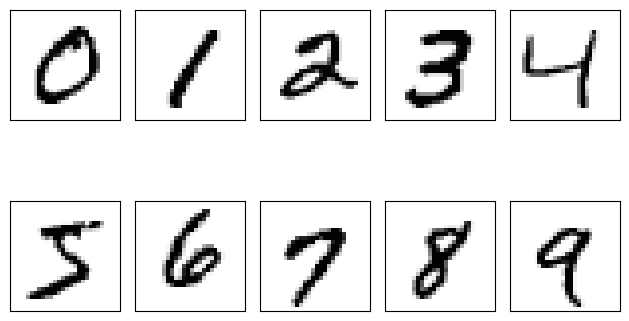

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==i ][0].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
incorrect_indices = np.where(y_result != train_labels)[0]
print(incorrect_indices)

[   80   132   148   172   180   418   494   500   635   854   902   966
  1032  1055  1088  1138  1201  1243  1244  1259  1287  1352  1375  1604
  1818  1854  1920  1968  2044  2098  2320  2426  2676  2720  2764  2803
  2901  3100  3268  3532  3682  3696  4050  4122  4150  4295  4362  4382
  4438  4476  4522  4638  4692  5002  5063  5084  5216  5368  5482  5554
  5821  5896  5936  5972  6066  6100  6102  6130  6170  6269  6347  6428
  6448  6466  6658  6711  6714  6810  6879  6885  6920  7006  7036  7078
  7080  7270  7530  7584  7599  7678  7851  7898  8200  8202  8228  8278
  8298  8451  8471  8480  8491  8688  8693  8709  8729  8772  8816  8853
  8854  8857  8879  8883  8898  8966  9098  9190  9256  9290  9348  9396
  9431  9442  9948 10012 10064 10116 10156 10205 10251 10273 10285 10382
 10644 10756 10800 10867 10944 10994 11039 11044 11210 11245 11378 11619
 11657 11747 11767 11781 11949 12183 12211 12268 12305 12559 12650 12679
 12692 12805 12830 12834 13080 13376 13691 13713 13

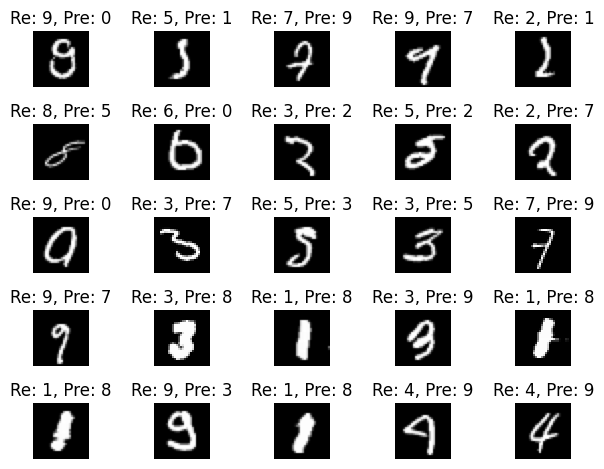

In [ ]:
import matplotlib.pyplot as plt

# Ustaw liczbę wierszy i kolumn dla wyświetlania zdjęć
num_rows = 5
num_cols = 5

# Wyświetl pierwsze `num_rows * num_cols` zdjęć
for i, index in enumerate(incorrect_indices[:num_rows * num_cols]):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Re: {train_labels[index]}, Pre: {y_result[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import numpy as np

img = Image.open("img4.jpg").convert('L')

img = img.resize((28, 28))

img_array = np.array(img).reshape(1, 28*28)

img_array = img_array.astype('float32') / 256
img_array = 1 - img_array
print(img_array)

[[0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.0078125  0.01171875 0.00390625 0.00390625
  0.0078125  0.00390625 0.00390625 0.01171875 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.015625   0.00390625 0.0078125  0.0078125
  0.0078125  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.015625   0.265625
  0.75390625 0.3828125  0.00390625 0.0234375  0.0078125  0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
  0.00390625 0.00390625 0.00390625 0.00390625 0.003

In [ ]:
prediction = network.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Przewidziana cyfra: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Przewidziana cyfra: 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


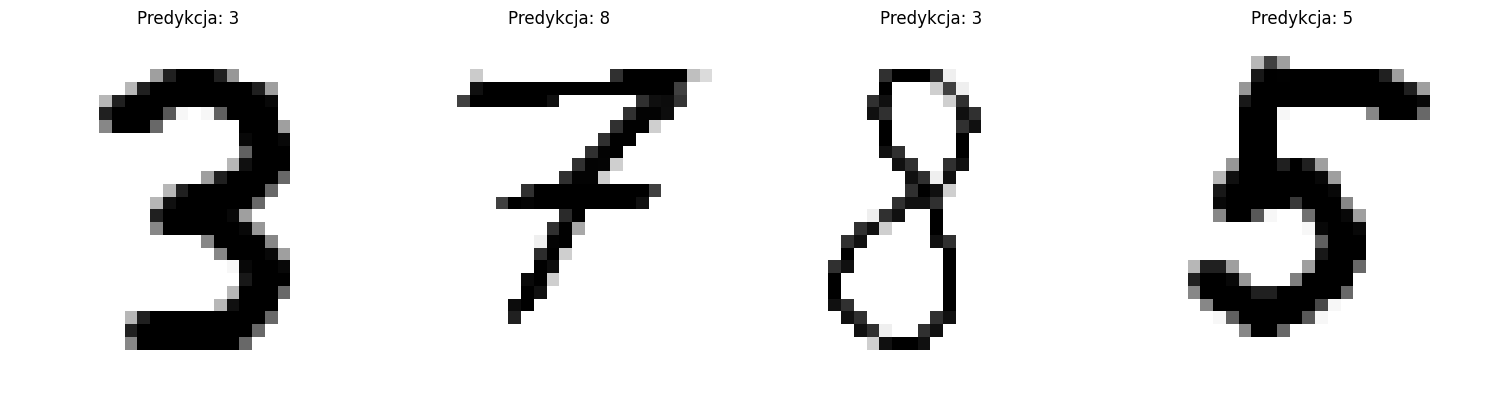

Predykcje: [3, 8, 3, 5]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def analyze_images(image_paths):
  num_images = len(image_paths)
  fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

  predictions = []

  for i, image_path in enumerate(image_paths):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).reshape(1, 28*28)
    img_array = img_array.astype('float32') / 255
    img_array = 1 - img_array

    prediction = network.predict(img_array)
    predicted_digit = np.argmax(prediction)
    predictions.append(predicted_digit)

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Predykcja: {predicted_digit}")
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

  print("Predykcje:", predictions)

image_paths = ["img3.png", "img7.png", "img8.png", "img5.png"]
analyze_images(image_paths)